<a href="https://colab.research.google.com/github/Viniciusvto/piramide_etaria_BGE/blob/main/Data_IBGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd # importei a biblioteca pandas
import matplotlib.pyplot as plt # com essa crio gráficos
import seaborn as sns # uma biblioteca com gráficos mais bonitos e integrados ao pandas.
sns.set(style = 'whitegrid',palette='pastel') # escolhas de temas e cores dos gráficos

1- vou ler os meus dados

In [74]:
df = pd.read_excel('/content/IBGE Projeção.xlsx', skiprows= 6 ,skipfooter=1 ) #irei desconsiderar as primeiras 6 linhas e a ultima
df

,Unnamed: 0,Homens,Mulheres
0,0 a 4 anos,7192133,6861293
1,5 a 9 anos,7495730,7156303
2,10 a 14 anos,7506047,7173253
3,15 a 19 anos,7418949,7117070
4,20 a 24 anos,7741213,7495658
5,25 a 29 anos,8387530,8230970
6,30 a 34 anos,8473141,8501254
7,35 a 39 anos,8365378,8541313
8,40 a 44 anos,8318165,8663516
9,45 a 49 anos,7731316,8246251


2 -  Renomear as colunas

In [75]:
df.columns = ['Idade', 'M', 'F'] # Renomeio as colunas
df.loc['total']= df.sum() # crio uma nova linha chamada de total e somo os valores para a ultima linha
df.loc[df.index[-1], 'idade'] = 'total' # Garante que o valor da coluna 'idade' na última linha seja o 'total'.
df

,Idade,M,F,idade
0,0 a 4 anos,7192133,6861293,NaN
1,5 a 9 anos,7495730,7156303,NaN
2,10 a 14 anos,7506047,7173253,NaN
3,15 a 19 anos,7418949,7117070,NaN
4,20 a 24 anos,7741213,7495658,NaN
5,25 a 29 anos,8387530,8230970,NaN
6,30 a 34 anos,8473141,8501254,NaN
7,35 a 39 anos,8365378,8541313,NaN
8,40 a 44 anos,8318165,8663516,NaN
9,45 a 49 anos,7731316,8246251,NaN


In [76]:
total_geral = df.loc[df.index[-1], 'F']+df.loc[df.index[-1],'M'] # Soma de total entre H e M da linha total
total_geral

np.int64(224406802)

In [77]:
df = df.drop('total', axis=0) #apago a linha de total para impedir que ela apareça no gráfico
df # Exibe a tabela sem a linha total

,Idade,M,F,idade
0,0 a 4 anos,7192133,6861293,NaN
1,5 a 9 anos,7495730,7156303,NaN
2,10 a 14 anos,7506047,7173253,NaN
3,15 a 19 anos,7418949,7117070,NaN
4,20 a 24 anos,7741213,7495658,NaN
5,25 a 29 anos,8387530,8230970,NaN
6,30 a 34 anos,8473141,8501254,NaN
7,35 a 39 anos,8365378,8541313,NaN
8,40 a 44 anos,8318165,8663516,NaN
9,45 a 49 anos,7731316,8246251,NaN


In [78]:
df ['M'] = df['M']/total_geral*-100 # Converte o valor de homens em porcentagem negativa (lado esquerdo da pirâmide)
df ['F'] = df['F']/total_geral*100 # Converte o valor de mulheres em porcentagem positiva (lado direito da pirâmide)
df # Mostro a tabela com os dados em porcentagem -M e +F

,Idade,M,F,idade
0,0 a 4 anos,-3.204953,3.057525,NaN
1,5 a 9 anos,-3.340242,3.188987,NaN
2,10 a 14 anos,-3.344839,3.196540,NaN
3,15 a 19 anos,-3.306027,3.171504,NaN
4,20 a 24 anos,-3.449634,3.340210,NaN
5,25 a 29 anos,-3.737645,3.667879,NaN
6,30 a 34 anos,-3.775795,3.788323,NaN
7,35 a 39 anos,-3.727774,3.806174,NaN
8,40 a 44 anos,-3.706735,3.860630,NaN
9,45 a 49 anos,-3.445224,3.674689,NaN


In [80]:
#Inverter a ordem das idades
Idades = ['80 anos ou mais',
 '75 a 79 anos',
 '70 a 74 anos',
 '65 a 69 anos',
 '60 a 64 anos',
 '55 a 59 anos',
 '50 a 54 anos',
 '45 a 49 anos',
 '40 a 44 anos',
 '35 a 39 anos',
 '30 a 34 anos',
 '25 a 29 anos',
 '20 a 24 anos',
 '15 a 19 anos',
 '10 a 14 anos',
 '5 a 9 anos',
 '0 a 4 anos']

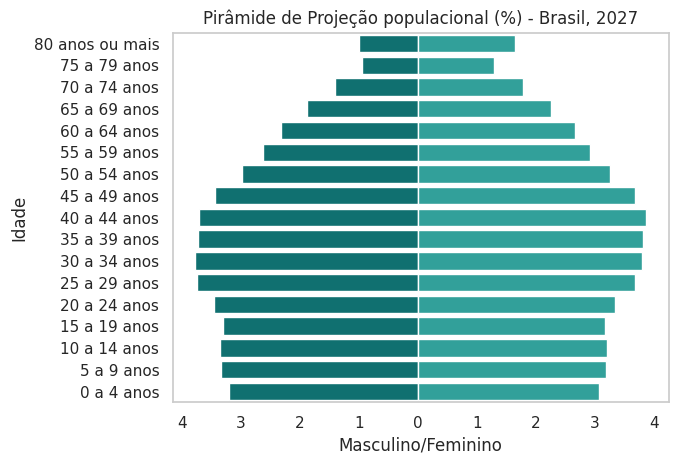

In [81]:
ax1 = sns.barplot(x='M', y='Idade', data=df, order=Idades, color="teal")
ax2 = sns.barplot(x='F', y='Idade', data=df, order=Idades, color="lightseagreen")
plt.title("Pirâmide de Projeção populacional (%) - Brasil, 2027")
plt.xlabel("Masculino/Feminino")
plt.grid(False)
plt.xticks(ticks=[-4, -3, -2, -1, 0, 1, 2, 3, 4],
labels=['4', '3', '2', '1', '0', '1', '2', '3', '4']);